# TP1 - Fouquerand / Montaut 

## I) Données artificielles et réelles 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rd

In [13]:
def gen_linear_basic(a,b,eps,nbex):
    e = eps*rd.randn(nbex)
    x = rd.uniform(-5,5,nbex)
    y = a*x+b+e
    return (x,y)

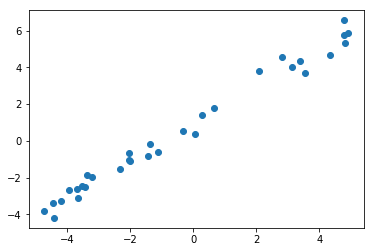

In [15]:
x,y = gen_linear_basic(1,1,0.5,32)

plt.scatter(x,y)
plt.show()

In [6]:
def gen_linear(a,b,eps,nbex):
    e = eps*rd.randn(nbex)
    x = rd.rand(nbex,len(a))*10-5
    y = np.dot(x,np.array(a))+b+e
    return (x,y)

In [16]:
x,y = gen_linear([1,1,1],5,0.5,32)
#print(x)
#print(y)

In [19]:
def read_file (fn):
    with open (fn) as f :
        names = f.readline()
        X = np.array ([[float(x) for x in l.strip().split(" ")] for l in f.readlines()])
    return X [:,:-1] , X [:, -1].reshape (-1)

In [54]:
f = read_file("housing.csv")

X = f[0] # housing inputs
Y = f[1] # housing outputs

In [55]:
#A.mean pour la moyenne
#A.std pour l'écart type

In [56]:
T = []
for i in range(13):
    T.append(X[:,i]) 

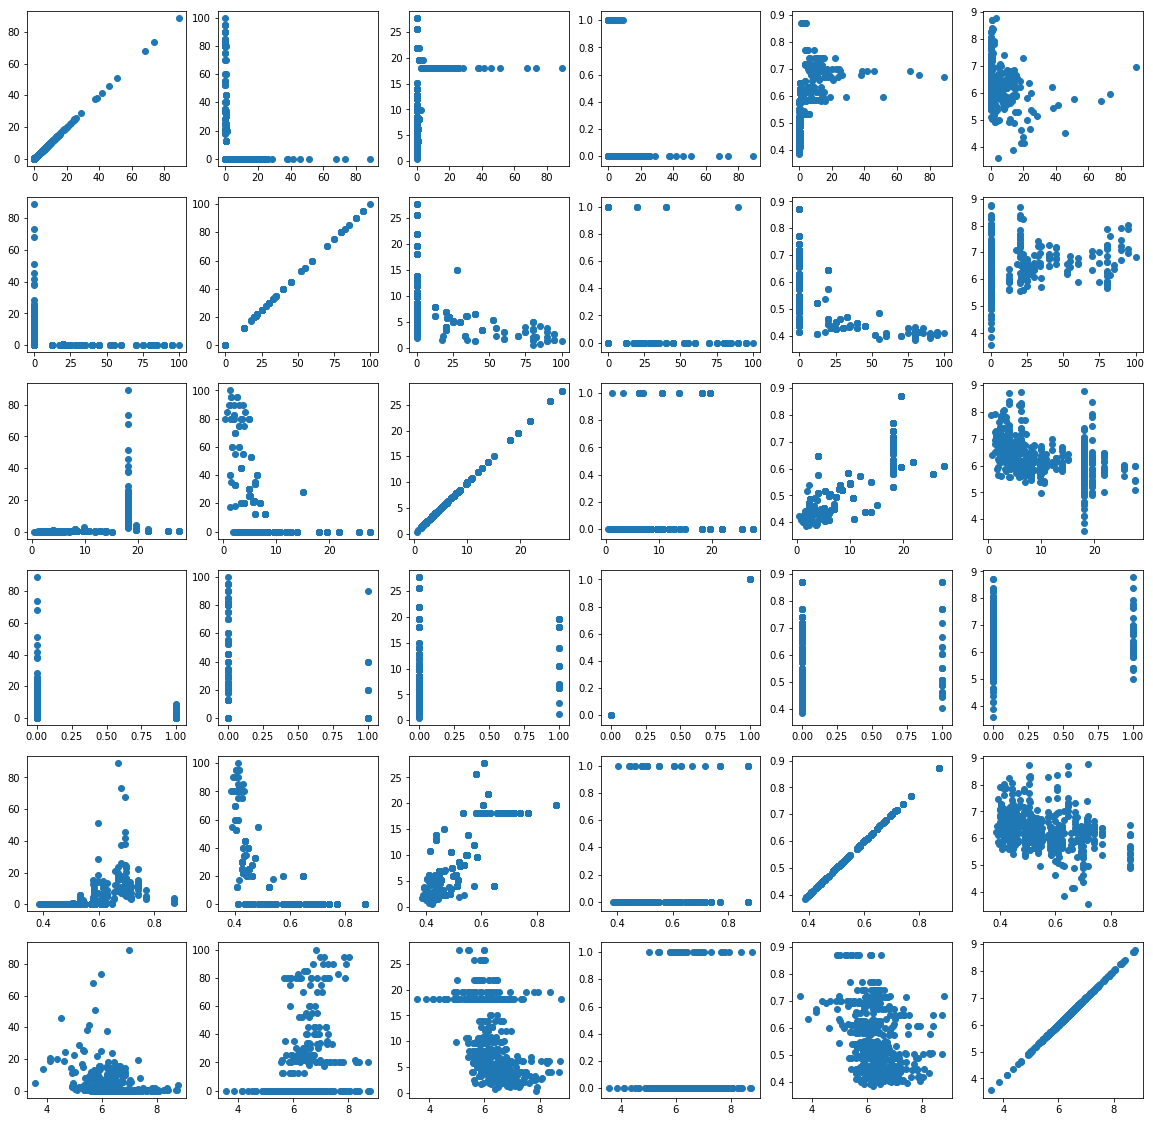

In [57]:
plt.figure(figsize=(20,20))
k = 1
for i in range(6):
    for j in range(6):
        plt.subplot(6,6,k)
        plt.scatter(T[i],T[j])
        k+=1
        
plt.show()

Il y a peu de corrélation sur les données. Ne pas se méprendre, les diagonales représentent les covariances de X[:,i] avec elle même.

## II) Régression linéaire

$$f_w(x) = w.\tilde{x} \textrm{ avec } \tilde{x} = (1,x)$$
<br>
$$\textrm{Forme matricielle : }Y = f_w(X) = \tilde{X}*w \textrm{ avec } \tilde{X} = (1,X) \textrm{ où 1 est le vecteur colonne avec des 1}$$
<br>
$$\textrm{MSE = }\frac{1}{2n}*||Y - \tilde{Y}||² \textrm{ avec n le nombre de données}$$

In [103]:
from scipy.optimize import minimize

def predict(w,X):
    #0 is the position, 1 is the value of the vector we add
    #axis=1 means we want to add a column vetor (0 would be a row vector)
    X_tilde = np.insert(X,0,1,axis=1) 
    return np.dot(w,X_tilde.transpose())

In [104]:
def mse(yhat, y):
    return np.mean((y-yhat)**2)


In [144]:
def regress(X,Y):
    X_tilde = np.insert(X,0,1,axis=1) 
    return np.linalg.pinv(np.dot(X_tilde.T,X_tilde)).dot(X_tilde.T).dot(Y)

In [156]:
def laComplete(e,nbex):
    w_known = [5,1,1,1]
    X,Y = gen_linear([1,1,1],5,e,nbex)
    w = regress(X,Y)
    yhat = predict(w,X)
    error = mse(yhat,Y)
    error_w = mse(w,w_known)
    return (w,yhat,error,error_w)

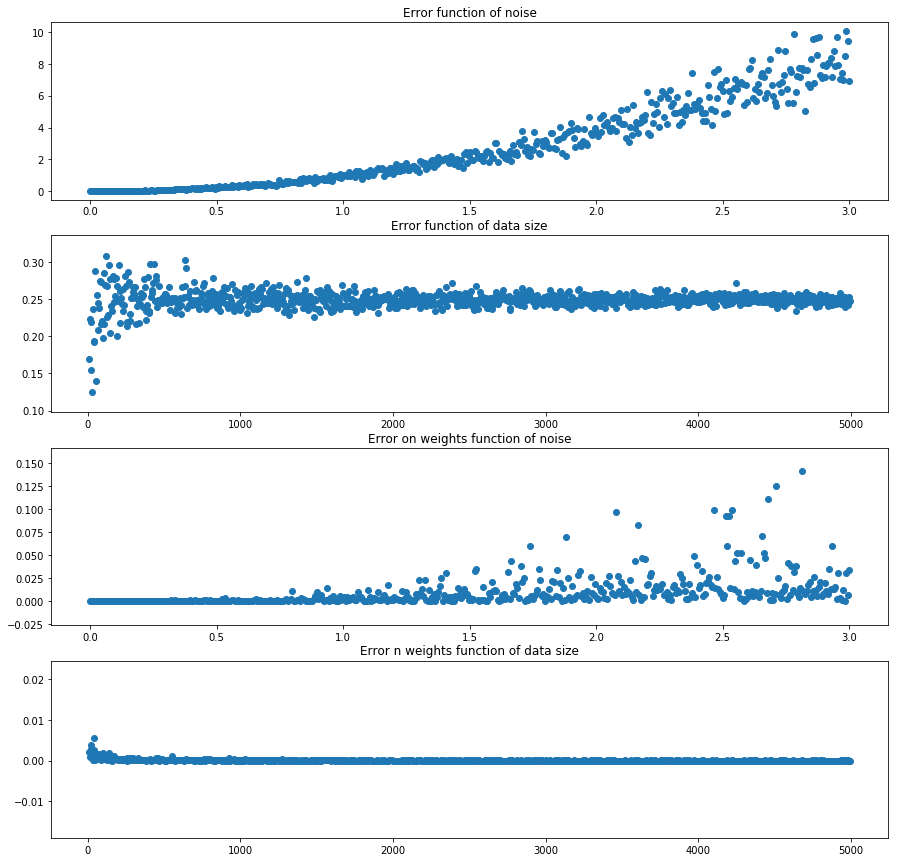

In [161]:
e = np.linspace(0,3,500)
nbex = range(10,5000,5) #generates an array

def testComplet():
    error_esp = [laComplete(esp,100)[2] for esp in e]
    error_n = [laComplete(0.5,n)[2] for n in nbex]
    error_w_esp = [laComplete(esp,100)[3] for esp in e]
    error_w_n = [laComplete(0.5,n)[3] for n in nbex]
    return(error_esp,error_n,error_w_esp,error_w_n)
    
error_esp,error_n,error_w_esp,error_w_n = testComplet()

plt.figure(figsize=(15,15))
plt.subplot(4,1,1)
plt.scatter(e,error_esp)
plt.title('Error function of noise')
plt.subplot(4,1,2)
plt.scatter(nbex,error_n)
plt.title('Error function of data size')
plt.subplot(4,1,3)
plt.scatter(e,error_w_esp)
plt.title('Error on weights function of noise')
plt.subplot(4,1,4)
plt.scatter(nbex,error_w_n)
plt.title('Error n weights function of data size')
plt.show()

L'erreur en fonction du bruit augmente lorsque la variance du bruit augmente.<br>
L'erreur en fonction de la quantité de données converge.<br>
<br>
L'erreur sur les coefficients augmente lorsque la variance augmente.<br>
Enfin, l'erreur sur les coefficients tend vers 0 lorsque le nombre de données augmente.

In [167]:
def laSavoyarde(e,nbex):
    w_known = [5,0,0,0,1,1,1]
    X,Y = gen_linear([0,0,0,1,1,1],5,e,nbex)
    w = regress(X,Y)
    yhat = predict(w,X)
    error = mse(yhat,Y)
    error_w = mse(w,w_known)
    return (w,yhat,error,error_w)

TypeError: list indices must be integers or slices, not tuple

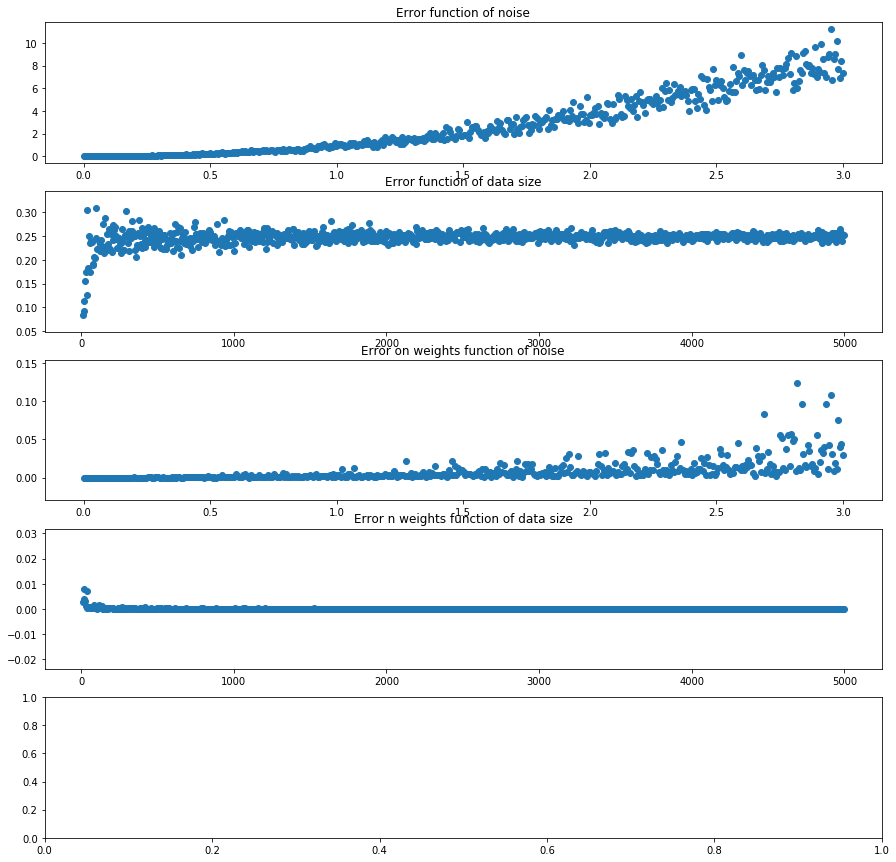

In [170]:
e = np.linspace(0,3,500)
nbex = range(10,5000,5) #generates an array

def testSavoyard():
    error_esp = [laSavoyarde(esp,100)[2] for esp in e]
    error_n = [laSavoyarde(0.5,n)[2] for n in nbex]
    error_w_esp = [laSavoyarde(esp,100)[3] for esp in e]
    error_w_n = [laSavoyarde(0.5,n)[3] for n in nbex]
    w_n = [laSavoyarde(0.5,n)[0] for n in nbex]
    return(error_esp,error_n,error_w_esp,error_w_n,w_n)

error_esp,error_n,error_w_esp,error_w_n,w_n = testSavoyard()

plt.figure(figsize=(15,15))
plt.subplot(5,1,1)
plt.scatter(e,error_esp)
plt.title('Error function of noise')
plt.subplot(5,1,2)
plt.scatter(nbex,error_n)
plt.title('Error function of data size')
plt.subplot(5,1,3)
plt.scatter(e,error_w_esp)
plt.title('Error on weights function of noise')
plt.subplot(5,1,4)
plt.scatter(nbex,error_w_n)
plt.title('Error n weights function of data size')
plt.subplot(5,1,5)
T = [w_n[i,1] for i in nbex]
plt.scatter(nbex,T)
plt.show()
